# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 10

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  15 баллов
* Задача 2 &mdash;  40 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash;  50 баллов
* Задача 4 &mdash;  40 баллов





-----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [2]:
import scipy.stats as sps
from IPython.display import display, Markdown

import sklearn


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

#import graphviz
from tqdm import tqdm_notebook

---
## Задача 1

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно с признаком $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

1) Монотонные функции от одного признака почти не меняют решающее дерево: это следует как из построения, так и из реальных экспериментов

2) Стандартизация признаков тоже почти не меняет дерева, объяснения как и в п. 1

3) преобразования кат признаков применять полезно, потому что работа дерева основана на отношении порядка. А между категориальными признаками отношения порядка нет.

4) Линейные / нелинейные преобразования - вообще хз, имеет ли сиысл и что это даст. от нескольких признаков - вообще хз. От одного - мб, чтобы как-то сгладить данные / улучшить их размещение.

5) В целом, помня специфику работы решающего дерева (делает ступеньки), лучше всеми правдами и неправдами повернуть поверхности, разделяющие разные группы точек, становились (кусочно) параллельны осям координат.

Можно более подробно почитать про это по ссылке:

https://rsyi.github.io/feature-transformation-tree/

## ## Задача 2

### 1. Загрузка и предобработка данных.




Скачайте [данные](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification) по классификации кристаллических решеток. Целевой переменной в этой задаче является `Lowest distortion`. С сырыми данными и более подробным описанием задачи можно ознакомиться также [здесь](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification).


In [3]:
data = pd.read_csv("Crystal_structure.csv")
data.head()

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


In [4]:
data.columns.values

array(['Compound', 'A', 'B', 'In literature', 'v(A)', 'v(B)',
       'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)',
       'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ',
       'Lowest distortion'], dtype=object)

Сделаем предобработку данных.

In [5]:
# уберем признаки, которые нам не нужны (подробнее можете почиать во вкладке 'Code' на странице датасета)
#"τ"
data = data.drop(["In literature", "Compound", "τ"], axis=1)
# убираем объекты, для которых неизвестен таргет
data = data.drop(data[data["Lowest distortion"] == "-"].index).reset_index(drop=True)
# закодируем целевую переменную числами
data['Lowest distortion'] = LabelEncoder().fit_transform(data['Lowest distortion'])
# закодируем категориальные признаки числами
data['A'] = LabelEncoder().fit_transform(data['A'])
data['B'] = LabelEncoder().fit_transform(data['B'])
# обработаем пропуски
for i in data.columns:
    column = data[i].values
    for k in range(len(column)):
        if column[k] == '-':
            column[k] = 0
    data[i] = column

In [6]:
data.head()

,A,B,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ,Lowest distortion
0,0,0,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,0.800000,0
1,0,1,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,0.678571,1
2,0,2,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,0.385714,0
3,0,3,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,0.371429,1
4,0,4,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,0.664286,1


### 2. Обучение модели


Создайте массив признаков и массив таргета.

In [7]:
X = data.loc[:, data.columns != "Lowest distortion"].values
y = data.loc[:, "Lowest distortion"].values
print(X,y)

[[0 0 '0' ... -3.248 0.707106781 0.8]
 [0 1 '0' ... -2.565071429 0.758259187 0.678571429]
 [0 2 '0' ... -1.846714286 0.918509839 0.385714286]
 ...
 [72 70 0 ... -2.626821429 0.689052991 0.678571429]
 [72 71 0 ... -2.03575 0.756670341 0.528571429]
 [72 72 0 ... -2.097821429 0.76380874 0.514285714]] [0 1 0 ... 1 0 0]


Обучите модель решающего дерева.

random_state = число, с помощью которого функции генерят случайные разбиения. Одно и то же значение приводит к воспроизводимым результатам.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 145)

In [9]:
print(X_train, y_train)

[[71 14 0 ... -3.971107143 0.529754266 1.192857143]
 [58 9 0 ... -2.566285714 0.630503547 0.714285714]
 [32 21 0 ... -2.581928571 0.691997662 0.671428571]
 ...
 [20 47 '0' ... -1.981178571 0.64051825 0.592857143]
 [22 50 '2' ... -1.346 0.753068722 0.428571429]
 [56 47 '0' ... -2.083285714 0.700765016 0.592857143]] [0 2 0 ... 1 0 1]


#### Решающее дерево

In [10]:
clf = DecisionTreeClassifier(random_state = 56)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=56)

Сделайте предсказание для тестовой выборки.

In [11]:
predictions = clf.predict(X_test)
accuracy_score(predictions, y_test)
print("2-Норма ошибки для решающео дерева: ", np.linalg.norm(predictions - y_test))

2-Норма ошибки для решающео дерева:  31.73326330524486


Создайте массив, показывающий успех или не успех модели (1 если модель угадала класс, 0 если не угадала).

In [12]:
# successes
sss = 1 - np.abs(predictions - y_test)

Вы получили выборку из распределения $Bern(\theta)$. Постройте доверительный интервал для $\theta$.

In [13]:
print("В тренировочной выборке ", np.size(y_train), " элементов.")

В тренировочной выборке  3693  элементов.


Доверительный интервал для уровня $\alpha$ получачется, как обычно, по ЦПТ, а именно для выборки $(X_1, \ldots, X_n)$ из биномиального распределения при больших $n$:

$$
     |\theta - \hat\theta| \leq \delta = \frac{\hat{\sigma} \left| z_{\alpha/2} \right|}{\sqrt{n}}, \qquad \hat{\sigma}^2 = \frac{n}{n-1} \left( \overline{X^2} - \overline{X}^2 \right),
$$

где $z_{\alpha/2}$ - это $\frac{\alpha}{2}$-квантиль нормального распределения.  

In [14]:
# считаем нужные параметры
alpha = 0.05
n = np.size(sss)
delta = np.sqrt( 1 / (n - 1) ) * np.std(sss) * np.abs( sps.norm().ppf(alpha/2) )
theta = np.mean(sss)

In [15]:
print(r'Оценка параметра \theta: ', round(theta, 3))
print(r"Погрешность оценки параметра \theta: ", round(delta, 3))

Оценка параметра \theta:  0.601
Погрешность оценки параметра \theta:  0.034


#### Случайный лес

Повторите все шаги для случайного леса. Сравните полученные интервалы.

In [16]:
n_estimators = 40
model = RandomForestRegressor(n_estimators=n_estimators)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=40)

In [17]:
predictions = model.predict(X_test)
print(predictions)
#accuracy_score(predictions, y_test)
print("2-Норма ошибки для случайного леса: ", np.linalg.norm(predictions - y_test))

[0.8   0.125 1.075 ... 0.825 0.125 0.   ]
2-Норма ошибки для случайного леса:  23.898143233314173


Интересно также посмотреть на зависимость ошибки от числа деревьев в лесу.

In [18]:
N = 100
errors = np.empty(N + 1)

for i in range(1, N+1):
    model = RandomForestRegressor(n_estimators=i)
    model.fit(X_train, y_train)
    errors[i] = np.linalg.norm(model.predict(X_test) - y_test)
    print(errors[i])

32.83291031876401
27.60434748368452
27.874719729532707
26.514147167125703
25.81394971715874
25.496187078768376
25.32644016494563
25.224306234265395
24.78549954417544
24.825994441310907
24.65463931331022
24.518417114034452
24.09731257573718
24.310176755374503
24.4613073149322
24.17764657178196
23.80369544745137
24.06889545440467
23.951069696616646
24.354876308452074
24.57138242889724
23.91799004795102
24.141047411666403
23.8397427279183
24.210179677152336
23.818346069100922
24.079913821628686
23.959361853107918
23.77145441878356
24.048931600200266
24.09750830163887
24.170637694576865
23.96707260659216
23.784117727075003
23.901191158088963
23.973590150233193
23.852587824928897
23.799587393709228
23.893886607781283
23.880679952631162
23.83507181494441
23.932776223785186
23.919585400069025
23.629719345849974
23.682290096135784
23.555278266569065
23.778383006747386
23.939784486289767
23.92295526103518
23.857066039226197
23.70989602571409
23.676107410851497
23.72166387778588
23.9033619665916

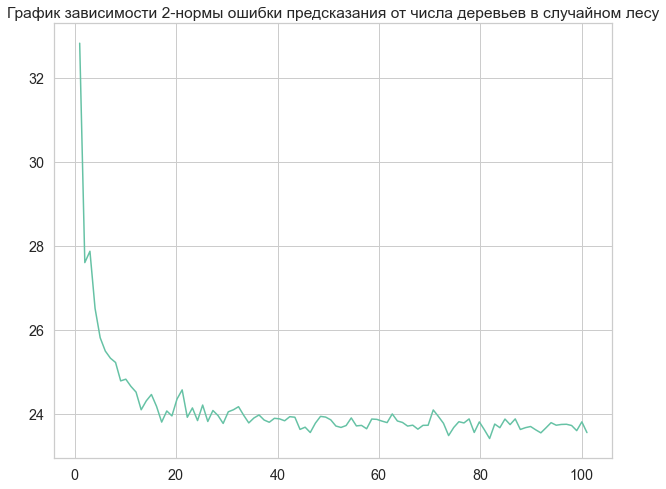

In [19]:
plt.figure(figsize = (10,8))

plt.plot(np.linspace(1, N+1, N), errors[1:N+1])

plt.title("График зависимости 2-нормы ошибки предсказания от числа деревьев в случайном лесу")

plt.show()

Видим, что чем больше деревьев, тем лучше предсказательная способность. Но по факту, 20 деревьев для рассматривемой выборки уже ок.. Поэтому, столько и выберем.

In [20]:
n_estimators = 20
model = RandomForestRegressor(n_estimators=n_estimators)
model.fit(X_train, y_train)
sss = 1 - np.abs(predictions - y_test)

In [21]:
# считаем нужные параметры
alpha = 0.05
n = np.size(sss)
delta = np.sqrt( 1 / (n - 1) ) * np.std(sss) * np.abs( sps.norm().ppf(alpha/2) )
theta = np.mean(sss)

In [22]:
print(r'Оценка параметра \theta: ', round(theta, 3))
print(r"Погрешность оценки параметра \theta: ", round(delta, 3))

Оценка параметра \theta:  0.622
Погрешность оценки параметра \theta:  0.023


**Выводы:** Ну, решающее дерево - хорошо, а случайный лес - лучше. Реально дал улучшение на 30%. очень даже прилично. Нормас!

## Задача 3

Рассмотрим данные из <a href='https://miptstats.github.io/courses/ad_mipt/hw8.html' target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [23]:
df = pd.read_csv("physics_data.csv")
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,292,293,294,295,296,297,298,299,pubchem_id,Eat
0,0,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,13.424011,-4.923189,...,-0.023466,-0.066633,0.030779,-0.036064,-0.008572,0.011805,-0.036215,0.052180,25004,-19.013763
1,1,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,-19.296032,-0.433598,...,-0.000419,0.003369,-0.000641,-0.001035,0.012597,0.004377,0.004023,0.003356,25005,-10.161019
2,2,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,7.488163,11.392693,...,-0.003377,-0.003500,0.002734,-0.001017,0.004774,0.012796,0.022270,0.008051,25006,-9.376619
3,3,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,-5.516521,13.793978,...,-0.001423,-0.000576,0.011144,-0.007253,-0.006700,-0.007940,0.022492,-0.007016,25009,-13.776438
4,4,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,6.784151,11.208725,...,0.008307,-0.003005,0.000816,-0.000938,0.001135,-0.005256,0.001042,0.002651,25011,-8.537140


Первым делом, посмотрим, есть ли пропуски в данных и как они распределены. Удобно для этого построить цветовую карту таблицы с помощью seaborn

<AxesSubplot:>

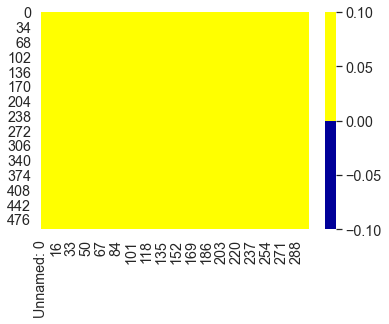

In [24]:
cols = df.columns[:30]
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 

sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

Отлично, пропусков нет. Теперь выберем интереующие нас признаки (все, кроме номера молекулы, то есть нулевого и 300-го индексов).

In [25]:
y = df['Eat'].values
X = df.iloc[:, 1:300].values
data = np.concatenate( (X, np.reshape(y, (np.size(y), 1) ) ), axis = 1)
print(np.size(np.transpose(X)[0]))
print(np.shape(data))

500
(500, 300)


Проверим также, есть ли неинформативные признаки. Например, их можно определить как признаки, 95% которых содержат одинаковые значения.

In [26]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

In [27]:
print(low_information_cols)

[]


Как видим, таких нет. Отлично, переходим к выбросам.

Теперь отбрасываем выбросы. Идея в том, чтобы по каждому из параметров посчитать дисперсии, и вне диапазона в $3\sigma$ отбросить нафиг точки. Хотя, еслит по каждому из признаков отбрасывать независимо, будет беда, ибо получим разные количества на выходе. Значит, нужно бы считать общую дисперсию и сравнивать 2-норму. И, видимо, чтобы не было проблемов, признаки как раз стандартизируем.

Правда, лучше не 2-норму, а инф-норму, то есть по квадратику выбирать, это естественнее: каждый параметр независимо рассматривать. И в случае больших размерностей они там что-то по типу в $\sqrt{dim}$ раз отличаются, так что возьмем лучше оценку построже.

In [28]:
# m - число признаков
N, m = np.shape(X)
# N - число строк
print("Размеры таблицы: ", m, N)

# смещенные оценки, пофиг, их можно не смещать, потому что число много больше 1
dispersions = np.std(X, axis = 0)
# лучше использовать медианы, а не средние, потому что на них выбросы меньше влияли
medians = np.median(X, axis = 0)
print(np.size(dispersions), np.size(medians))

Размеры таблицы:  299 500
299 299


In [29]:
# выберем через select нужные элементы

# пробежимся по строкам, и те, у которых хотя бы по одному параметру есть отклонение 
# больше, чем полторы сигмы от медианы - нахуй. Ну то есть, индексы этих строк запишем в список
# далее уберем там повторы и оставим только те строки, индексов которых в этом списке нет.

indices = []

for i in range(m):
    # главное - не спутать столбцы со строками
    x = np.transpose(X)[i]
    # выбрали i-ю колонку
    conds = [ np.abs(x - medians[i]) > 3 * dispersions[i] ]
    # print(conds)
    # print(np.transpose( np.argwhere(conds))[1])
    indices += np.transpose(np.argwhere(conds))[1].tolist()

In [30]:
# удаляем все повторяющиеся элементы
indices = list(set(indices))
print(len(indices))

295


ага, получаем облом, потому что мы эдак, походу, вообще все удалили. Ну или почти все, если побольше сигм добавить..

Хотя, если прям 3 сигмы поставить, то норм будет, еще целых 300 точек останется. И это мы еще на целевой параметр не смотрели!

Но для разнообразия посмотрим также, что будет, если по 2-норме выкидывать. Ну и чтобы не было проблем с доминированием одних признаков над другими, отнормируем выборку. теперь-то мы разные дисперсии складывать будем!

In [31]:
scaler = StandardScaler()
# нормируем всю выборку, включая будущую тестовую, так как отбрасываем выбросы. 
# когда будем делать дерево, отдельно отнормируем тренировочную
scaler.fit(data)
data = scaler.transform(data)

#scaler_y = StandardScaler()
#print(y)
#scaler_y.fit(y)
#y_std = scaler_y.transform(y)

# после нормировки среднее - 0, а дисперсия - 1
cond = [np.linalg.norm(data, axis = 1) > 3 * np.sqrt(m + 1)]
print(np.size(cond))
indices = np.transpose(np.argwhere(cond))[1]
print(indices)

500
[205 289]


Выкидываем выбросы, согласно найденному массиву индексов:

In [32]:
X = np.delete(X, indices, axis = 0)
y = np.delete(y, indices)

Как видим, теперь выбросов сильно поменьше. Так что, чтобы не выкидывать данные почем зря, попользуемся 2-нормой. Кстати, нормировка достаточно сильно уменьшила число выбросов. И мы используем объединенный массив из аргументов и целевого параметра, чтобы и по оси ординат выбросы отлавливать.

Выбросы выкинуть нужно, потому что, как мы помним, решающие деревья к ним очень чувствительны.

Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сделать скриншот визуализации и прислать его в бот вместе с ноутбуком.*

In [33]:
# дробим выборку на обучающую, валидационную и тестовую в отношении 6:2:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 34)

Поскольку наш целевой параметр - энергия - не дискретный, а непрерывный, то вместо классификатора используем регрессор. Интерфейс тот же.

In [34]:
model = DecisionTreeRegressor(random_state = 37, max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=37)

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

Ошибку будем считать через 2-норму разности (MSE). Или accuracy-метрику. Лучше и то, и то, чтобы сравнить со случ лесом. А нет! не получится accuracy, так как целевой параметр непрерывный. Ну ладно, MSE так MSE.

In [35]:
max_depth = 50

mse = np.empty(max_depth)

for i in range(1, max_depth+1):
    # подбираем параметры на валидационной части выборки
    model = DecisionTreeRegressor(random_state = 37, max_depth = i)
    model.fit(X_train, y_train)
    pred_val = model.predict(X_val)
    mse[i - 1] = mean_squared_error(y_val, pred_val)


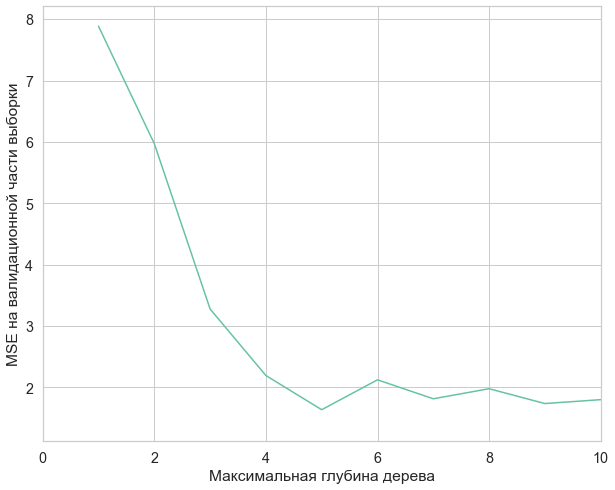

In [36]:
plt.figure(figsize = (10,8))

plt.plot(range(1, max_depth+1), mse)

plt.xlabel("Максимальная глубина дерева")
plt.ylabel("MSE на валидационной части выборки")

plt.xlim( (0,10) )

plt.show()

Короче, примерно с 14 модель прям видно как переобучается и просто фитирует все. Так что (неожиданно), как и в условии , берем глубину равной 3.

Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

In [37]:
# аналогично, подбираем параметр min_samples_leaf
depth = 3
max_min_leaf = 50
mse = np.empty(max_depth)

for i in range(1, max_min_leaf+1):
    # подбираем параметры на валидационной части выборки
    model = DecisionTreeRegressor(random_state = 37, max_depth = 3, min_samples_leaf = i)
    model.fit(X_train, y_train)
    pred_val = model.predict(X_val)
    mse[i - 1] = mean_squared_error(y_val, pred_val)


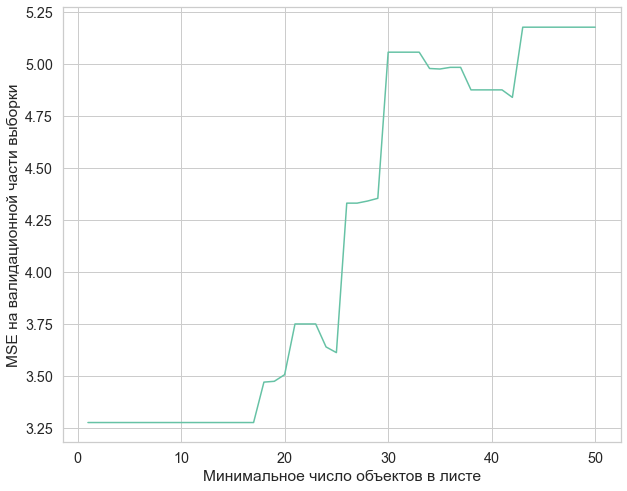

In [38]:
plt.figure(figsize = (10,8))

plt.plot(range(1, max_min_leaf+1), mse)


plt.xlabel("Минимальное число объектов в листе")
plt.ylabel("MSE на валидационной части выборки")

#plt.xlim( (0,10) )

plt.show()

Короче, норм число объектов - тоже 3. оч интересно, реально магическое число

Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

In [39]:
model = DecisionTreeRegressor(random_state = 37, max_depth = 4, min_samples_leaf = 3)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
print("MSE для тестовой части выборки: ", mean_squared_error(pred_test, y_test))

MSE для тестовой части выборки:  2.638698906611854


Получаем ошибку, сопоставимую с ошибкой на валидационной выборке. Радуемся? Наверное..

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

In [40]:
imps = model.feature_importances_
indices = np.transpose(np.argwhere([imps > 0]))[1]
nonzero_imps = imps[indices]
print(indices, nonzero_imps, imps)

[ 0  2  4 20 21 24 27 34 35 43 57] [0.03565208 0.46917933 0.33229556 0.0504469  0.02864432 0.02700431
 0.0136488  0.01097541 0.01030313 0.01332819 0.008522  ] [0.03565208 0.         0.46917933 0.         0.33229556 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0504469  0.02864432 0.         0.
 0.02700431 0.         0.         0.0136488  0.         0.
 0.         0.         0.         0.         0.01097541 0.01030313
 0.         0.         0.         0.         0.         0.
 0.         0.01332819 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.008522   0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.    

Видим,что у почти всех признаков важности нулевые. выбираем те, что не 0 и строим гистограммку, как нас и просят 

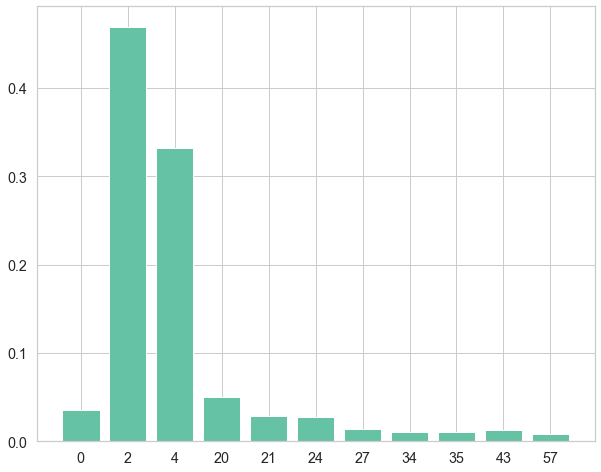

In [41]:
plt.figure(figsize = (10,8) )

plt.bar( list(df.columns.values[1:][indices]), nonzero_imps)

plt.show()

Сделайте выводы.

**Вывод:** По факту, есть всего 2 самых главных признака, под индексами 2 и 4. Дальше идут 4 сильно менее значимых, и остальными можно пренебречь. В принципе, это похоже на физику: есть простая формула в главном порядке, далее идут более сложные поправки первого порядка, но все еще простые, и так далее, с последовательным усложнением.

## Задача 4

Для данных из задачи 3 обучите случайный лес на 500 деревьев.

In [43]:
n_estimators = 500
model = RandomForestRegressor(n_estimators=n_estimators)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

In [47]:
errors = np.array([mean_squared_error(tree.predict(X_test), y_test) for tree in model.estimators_])

mean_errors = np.cumsum(errors) / np.arange(1, n_estimators + 1, 1)

In [48]:
print(mean_errors)

[3.606073   4.53750899 4.01238888 3.97316868 3.90751222 3.84114418
 4.00147599 3.87396573 3.73919977 3.65215781 3.55299648 3.55938608
 3.4823638  3.42742371 3.55125855 3.51784456 3.48405136 3.44392373
 3.48840674 3.43575007 3.42804632 3.47989479 3.47766637 3.4285598
 3.40163275 3.49342824 3.46258733 3.49655576 3.50227088 3.47699519
 3.46055759 3.44262311 3.38872578 3.39136915 3.38864403 3.36618961
 3.3843287  3.37357903 3.37092038 3.48646618 3.48362618 3.47399412
 3.46580775 3.45553099 3.43401892 3.46436931 3.49907776 3.48782916
 3.48411477 3.48606089 3.49008733 3.47170863 3.4448096  3.47446479
 3.45360942 3.44041411 3.43490879 3.4304873  3.41845524 3.43680383
 3.42871159 3.43389334 3.41957371 3.41061956 3.40525491 3.40304028
 3.42516743 3.44877258 3.46976005 3.46620302 3.45259743 3.46462329
 3.47128891 3.48261531 3.49626173 3.48141067 3.46084468 3.484104
 3.47233435 3.47459812 3.47954281 3.47384798 3.46721468 3.4799931
 3.48594819 3.47002822 3.45229852 3.4731687  3.46910513 3.48910736

Для леса с максимальным количеством деревьев визуализируйте важность признаков, используя поле `feature_importances_`. 

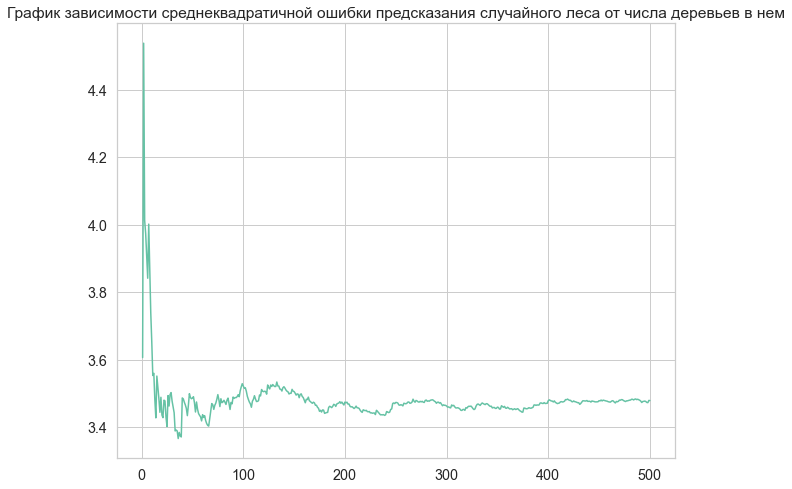

In [50]:
plt.figure(figsize = (10,8))

plt.plot(np.arange(1, n_estimators + 1, 1), mean_errors)
plt.title("График зависимости среднеквадратичной ошибки предсказания случайного леса от числа деревьев в нем")

plt.show()

In [57]:
imps = model.feature_importances_
# нужно выбирать аккуратнее теперь. поставим порог не 0, как с деревом, а 10-2, например
indices = np.transpose(np.argwhere([imps > 1e-2]))[1]
nonzero_imps = imps[indices]
print(indices, nonzero_imps, imps)

[ 0  2  3  4  5 20 25 27] [0.02128414 0.44779957 0.0130962  0.26628636 0.01690282 0.040119
 0.01037993 0.01467128] [2.12841390e-02 2.45800981e-03 4.47799575e-01 1.30961977e-02
 2.66286364e-01 1.69028196e-02 9.98958064e-03 6.49533144e-03
 2.37756465e-03 4.92138310e-03 1.02727110e-03 7.09655535e-04
 6.16129729e-04 3.73016607e-04 2.21031332e-04 1.23250068e-03
 8.22206566e-04 1.42424802e-03 5.04053940e-04 6.47218408e-04
 4.01189984e-02 6.18377573e-03 1.87979541e-03 4.02161728e-03
 5.98252332e-03 1.03799304e-02 1.82640982e-03 1.46712752e-02
 1.03337809e-03 1.82852094e-03 2.94695060e-03 3.31755067e-04
 3.79935114e-04 6.27385067e-04 5.15498244e-03 6.44658973e-04
 3.24261372e-04 7.86233385e-04 6.66912716e-04 1.71926682e-03
 7.69461550e-04 2.99671745e-03 1.28800311e-03 5.14102361e-03
 2.07543747e-03 3.87560728e-03 5.64398616e-04 5.94296552e-04
 2.45495775e-04 3.70921517e-04 3.20402585e-04 9.90534935e-04
 6.94205745e-04 3.35713204e-04 4.36597314e-04 1.01340771e-03
 8.85511636e-04 9.31228291e-04 

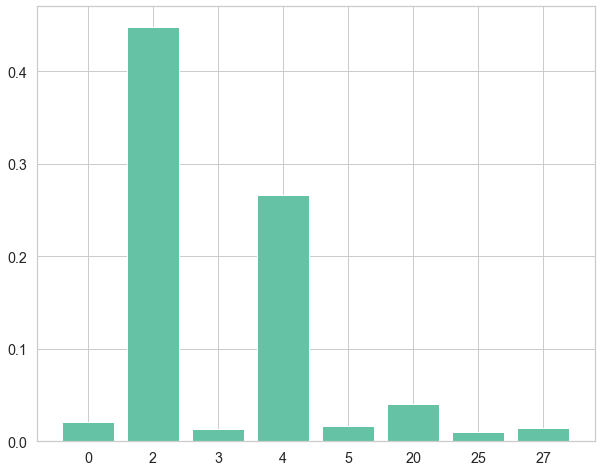

In [58]:
plt.figure(figsize = (10,8) )

plt.bar( list(df.columns.values[1:][indices]), nonzero_imps)

plt.show()

Сделайте выводы.

**Вывод:** Похоже на правду, конечно. Доминирующие признаки - с номерами 2,4 и 20, и их выделило как дерево, так и лес. Что же касается качества предсказания, реально почему-то так получается, что уже с 20-50 деревьев точность предсказания прям сильно повышается. Такие дела.